In [49]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Task 1: Dataset Preparation & Analysis

In [50]:
with open("/Users/gbardaklis/Mini-Project-1/goemotions.json/goemotions.json") as f:
    data = json.load(f)

In [51]:
# importing the json file into a dataframe 
df = pd.DataFrame(data, columns = ['Post', 'Emotion', 'Sentiment'])
df

,Post,Emotion,Sentiment
0,That game hurt.,sadness,negative
1,"You do right, if you don't care then fuck 'em!",neutral,neutral
2,Man I love reddit.,love,positive
3,"[NAME] was nowhere near them, he was by the Fa...",neutral,neutral
4,Right? Considering it’s such an important docu...,gratitude,positive
...,...,...,...
171815,"Well, I'm glad you're out of all that now. How...",joy,positive
171816,Everyone likes [NAME].,love,positive
171817,Well when you’ve imported about a gazillion of...,caring,positive
171818,That looks amazing,admiration,positive


In [52]:
postsDict = df['Post'].values.tolist()

In [53]:
# Returns the count of all 28 emotions, and stores it in countEmotions
countEmotions = df['Emotion'].value_counts()
# Turning the counts into a dictionary of pairs 
emotionsDict = countEmotions.to_dict()
# emotionsDict

In [54]:
# Returns the count of all 4 sentiments, and stores it in countSentiments
countSentiments = df['Sentiment'].value_counts()
# Turning the sentiment count into a dictionary of pairs 
sentimentsDict = countSentiments.to_dict()
# sentimentsDict

In [55]:
# # Stores emotions into a list
# emotion = df['Emotion'].tolist()
# # Removes emotions duplicate from the list
# emotion = list(dict.fromkeys(emotion))

In [56]:
# # Stores sentiments into a list
# sentiment = df['Sentiment'].tolist()
# # Removes sentiments duplicate from the list
# sentiment = list(dict.fromkeys(sentiment))

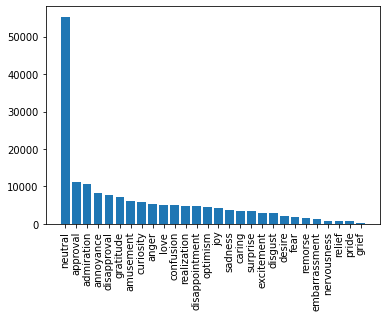

<Figure size 432x288 with 0 Axes>

In [57]:
# Printing histogram for emotions
plt.bar(emotionsDict.keys(), emotionsDict.values())
# 90 degree roration on x-axis labels
plt.xticks(rotation = 90)
plt.show()
plt.savefig('emotion-plot.pdf')

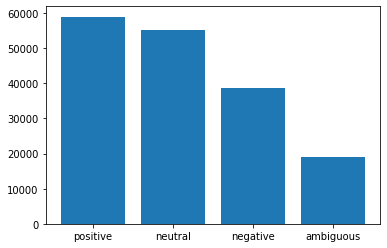

<Figure size 432x288 with 0 Axes>

In [58]:
# Printing sentiments in histogram
plt.bar(sentimentsDict.keys(), sentimentsDict.values())
plt.show()
plt.savefig('sentiment-plot.png')

# Task 2: Words as Features

In [59]:
# 2.1 --display the number of tokens (the size of the vocabulary) in the dataset

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(postsDict)
print(f'The size of the vocabulary is {vectorizer.get_feature_names_out().shape[0]} words.')

The size of the vocabulary is 30449 words.


In [60]:
# 2.2 --split the dataset into 80% for training and 20% for testing
post_train, post_test,emotion_train, emotion_test, sentiment_train, sentiment_test = train_test_split(df['Post'],df['Emotion'], df['Sentiment'], test_size=0.2, random_state = 1)

In [61]:
# 2.3 --train and test for both the emotion and sentiment classification using word frequency as features

In [62]:
#fit and transform emotion training data
vect = CountVectorizer()
emotion_train_dtm = vect.fit_transform(emotion_train)
emotion_train_dtm

<137456x28 sparse matrix of type '<class 'numpy.int64'>'
	with 137456 stored elements in Compressed Sparse Row format>

In [63]:
#fit and transform sentiment training data
sentiment_train_dtm = vect.fit_transform(sentiment_train)
sentiment_train_dtm

<137456x4 sparse matrix of type '<class 'numpy.int64'>'
	with 137456 stored elements in Compressed Sparse Row format>

In [64]:
#fit and transform emotion testing data
vect = CountVectorizer()
emotion_test_dtm = vect.fit_transform(emotion_test)
emotion_test_dtm

<34364x28 sparse matrix of type '<class 'numpy.int64'>'
	with 34364 stored elements in Compressed Sparse Row format>

In [65]:
#fit and transform sentiment testing data
sentiment_test_dtm = vect.fit_transform(sentiment_test)
sentiment_test_dtm

<34364x4 sparse matrix of type '<class 'numpy.int64'>'
	with 34364 stored elements in Compressed Sparse Row format>

In [66]:
# 2.3.1 --Base-MNB with the default parameters
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
%time mnb.fit(emotion_train_dtm, sentiment_train)

CPU times: user 1.39 s, sys: 10.2 ms, total: 1.4 s
Wall time: 1.4 s


MultinomialNB()

In [67]:
# 2.3.2 --Base-DT with the default parameters
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dt = DecisionTreeClassifier(random_state = 0)
%time dt.fit(emotion_train_dtm, sentiment_train)

CPU times: user 503 ms, sys: 6.63 ms, total: 509 ms
Wall time: 511 ms


DecisionTreeClassifier(random_state=0)

In [68]:
#2.3.3 --Base-MLP with the default parameters
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1, max_iter=300)
%time mlp.fit(emotion_train_dtm, sentiment_train)

CPU times: user 9.63 s, sys: 85.6 ms, total: 9.72 s
Wall time: 9.76 s


MLPClassifier(max_iter=300, random_state=1)